<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch03_02_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.02. 여러가지 확률 분포
---
* 날짜:2022-05-04
* 이름:김민규

## 학습내용
    * 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포
      - 정규 분포
      - 지수 분포
      - 감마 분포
      - 베타 분포
      - 카이제곱 분포
    * 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.stats import * # 모든 함수를 임포트 합니다.

## 연속형 확률 분포
---



### **| 정규분포**

\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

```
sp.stats.norm(mu, std)
```

In [4]:
# 표준정규분포
mu, std = 0, 1
norm=sp.stats.norm(mu, std) # 확률 함수

* 확률 분포


In [5]:
norm.pdf([-1,0,1]) # 확률밀도함수

array([0.24197072, 0.39894228, 0.24197072])

In [6]:
X=[-1,0,1] # 앞의 방식과 같은 값을 가집니다.
p_x =norm.pdf(X)
print(p_x)

[0.24197072 0.39894228 0.24197072]


In [7]:
X = [np.linspace(-5,5,10)]
p_x = norm.pdf(X)
print(p_x)

[[1.48671951e-06 2.07440309e-04 8.42153448e-03 9.94771388e-02
  3.41892294e-01 3.41892294e-01 9.94771388e-02 8.42153448e-03
  2.07440309e-04 1.48671951e-06]]


* 누적 확률 분포


In [8]:
F_x = norm.cdf(X)
print(F_x)

[[2.86651572e-07 5.03521029e-05 2.73660179e-03 4.77903523e-02
  2.89257361e-01 7.10742639e-01 9.52209648e-01 9.97263398e-01
  9.99949648e-01 9.99999713e-01]]


* 표본 추출



(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]),
 <a list of 10 Patch objects>)

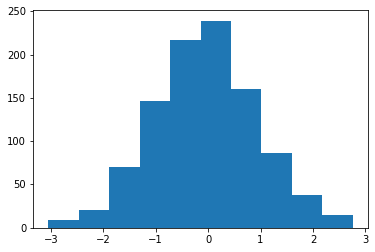

In [9]:
rvs=norm.rvs(1000,random_state=0) # 0에 가장 가깝게 뽑음
plt.hist(rvs)

#### **예제 01. 파라미터 변경-평균**

* 표준편차 `1`, 평균이 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

Text(0.5, 1.0, 'mus 0.5, std 1')

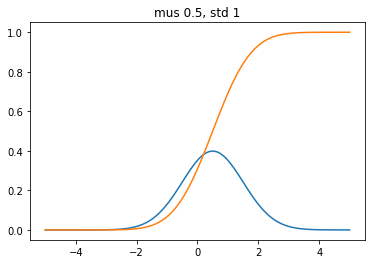

In [44]:
mus = [0.5,1,2,4]
std = 1
X = np.linspace(-5, 5, 100)

norm = sp.stats.norm(mus[0],std)
P_X=norm.pdf(X) # 확률밀도함수
F_X=norm.cdf(X) # 누적확률함수

plt.plot(X,P_X) # X에 대한 확률값

plt.plot(X,F_X) # X에 대한 누적값
plt.title('mus 0.5, std 1')

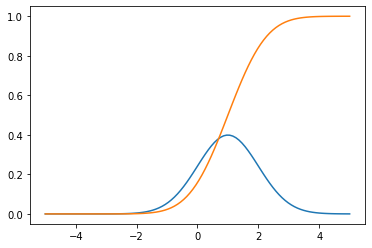

In [43]:
mus = [0.5,1,2,4]
std = 1
X = np.linspace(-5, 5, 100)

norm = sp.stats.norm(mus[1],std)
P_X=norm.pdf(X) # 확률밀도함수
F_X=norm.cdf(X) # 누적확률함수

plt.plot(X,P_X) # X에 대한 확률값

plt.plot(X,F_X) # X에 대한 누적값

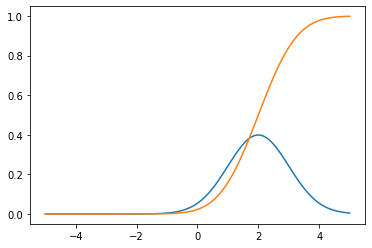

In [42]:
mus = [0.5,1,2,4]
std = 1
X = np.linspace(-5, 5, 100)

norm = sp.stats.norm(mus[2],std)
P_X=norm.pdf(X) # 확률밀도함수
F_X=norm.cdf(X) # 누적확률함수

plt.plot(X,P_X) # X에 대한 확률값

plt.plot(X,F_X) # X에 대한 누적값

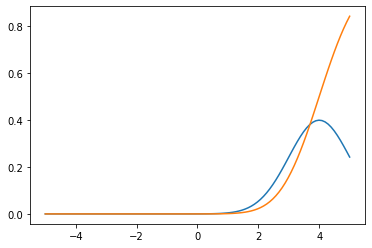

In [41]:
mus = [0.5,1,2,4]
std = 1
X = np.linspace(-5, 5, 100)

norm = sp.stats.norm(mus[3],std)
P_X=norm.pdf(X) # 확률밀도함수
F_X=norm.cdf(X) # 누적확률함수

plt.plot(X,P_X) # X에 대한 확률값

plt.plot(X,F_X) # X에 대한 누적값

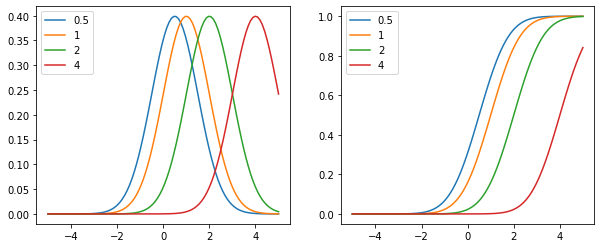

In [46]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()

xs = np.linspace(-5, 5, 100)
mus = [0.5,1,2,4]
std=1
for i, mu in enumerate(mus):
  norm = sp.stats.norm(mu, std)
  axes[0].plot(xs, norm.pdf(xs))
  axes[1].plot(xs, norm.cdf(xs))
axes[0].legend(mus)
_=axes[1].legend(mus)

#### **예제 02. 파라미터 변경-표준편차**

* 평균 `0`, 표준편차가 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

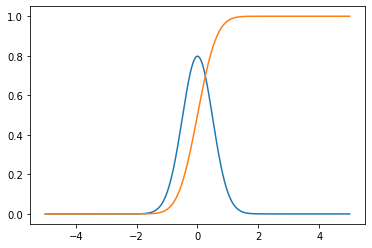

In [40]:
mus = 0
std = [0.5, 1, 2, 4]
X = np.linspace(-5,5,500)

norm = sp.stats.norm(mus,std[0])
P_X=norm.pdf(X) # 확률밀도함수
F_X=norm.cdf(X) # 누적확률함수

plt.plot(X,P_X) # X에 대한 확률값

plt.plot(X,F_X) # X에 대한 누적값

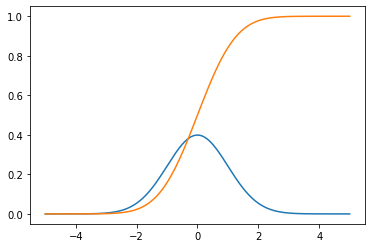

In [39]:
mus = 0
std = [0.5, 1, 2, 4]
X = np.linspace(-5,5,500)

norm = sp.stats.norm(mus,std[1])
P_X=norm.pdf(X) # 확률밀도함수
F_X=norm.cdf(X) # 누적확률함수

plt.plot(X,P_X) # X에 대한 확률값

plt.plot(X,F_X) # X에 대한 누적값

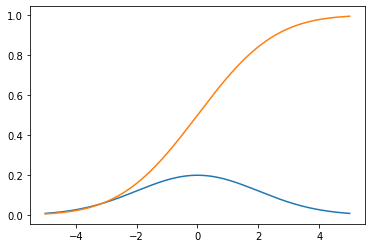

In [38]:
mus = 0
std = [0.5, 1, 2, 4]
X = np.linspace(-5,5,500)

norm = sp.stats.norm(mus,std[2])
P_X=norm.pdf(X) # 확률밀도함수
F_X=norm.cdf(X) # 누적확률함수

plt.plot(X,P_X) # X에 대한 확률값

plt.plot(X,F_X) # X에 대한 누적값

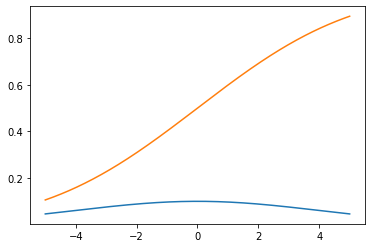

In [45]:
mus = 0
std = [0.5, 1, 2, 4]
X = np.linspace(-5,5,500)

norm = sp.stats.norm(mus,std[3])
P_X=norm.pdf(X) # 확률밀도함수
F_X=norm.cdf(X) # 누적확률함수

plt.plot(X,P_X) # X에 대한 확률값

plt.plot(X,F_X) # X에 대한 누적값

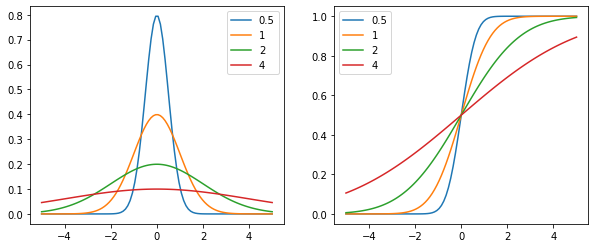

In [47]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()

xs = np.linspace(-5, 5, 100)
mu = 0
stds=[0.5,1,2,4]
for i, std in enumerate(stds):
  norm = sp.stats.norm(mu, std)
  axes[0].plot(xs, norm.pdf(xs))
  axes[1].plot(xs, norm.cdf(xs))
_=axes[0].legend(stds)
_=axes[1].legend(stds)

#### **예제 03. 손의 길이**

성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 1000명을 표본으로 뽑고 히스토 그램을 그리세요.

(array([  8.,  26.,  76., 147., 194., 236., 181.,  83.,  37.,  12.]),
 array([ 7.58653458,  9.04690962, 10.50728466, 11.9676597 , 13.42803474,
        14.88840978, 16.34878482, 17.80915986, 19.2695349 , 20.72990994,
        22.19028498]),
 <a list of 10 Patch objects>)

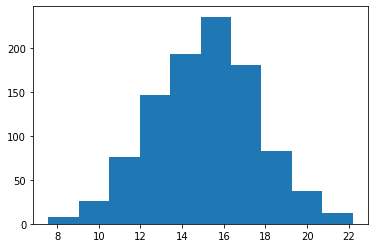

In [50]:
norm = sp.stats.norm(15.2,2.5)
#rvs=norm.rvs(1000,random_state=0) # 0에 가장 가깝게 뽑음
plt.hist(norm.rvs(1000))

### **| 카이제곱 분포**

\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\end{align}

```
sp.stats.chi2(df=df)
```

In [101]:
chi2 = sp.stats.chi2(df=1)

* 확률 분포


In [102]:
xs = np.linspace(0.01, 5, 10)
chi2.pdf(xs)

array([3.96952547, 0.40043489, 0.21555244, 0.13358544, 0.08774418,
       0.05950621, 0.04118183, 0.02890209, 0.02049307, 0.01464498])

* 누적 확률 분포


In [103]:
xs = np.linspace(0.01, 5, 10)
chi2.cdf(xs)

array([0.07965567, 0.54752497, 0.70984217, 0.80418734, 0.86445132,
       0.90468417, 0.93224827, 0.9514577 , 0.9650078 , 0.97465268])

* 표본 추출


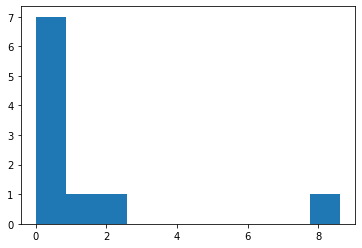

In [104]:
chi2.rvs(10, random_state=0)
_=plt.hist(chi2.rvs(10, random_state=0))

#### **예제 01. 파라미터 변경-자유도**

* 자유도(df) 값이 각각 `1,2,3,4`인 카이제곱분포와 누적 확률 분포를 그리세요.

sp.stats.chi2(df=df)

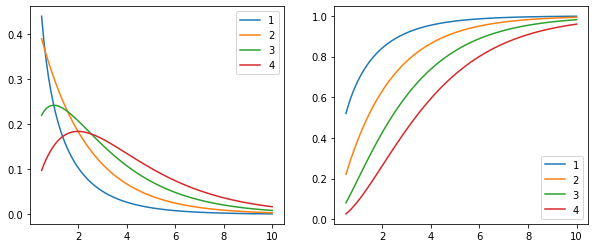

In [105]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()

xs = np.linspace(0.5, 10, 100)
dfs=[1,2,3,4]
for i, df in enumerate(dfs):
  chi2 = sp.stats.chi2(df)
  axes[0].plot(xs, chi2.pdf(xs))
  axes[1].plot(xs, chi2.cdf(xs))
_=axes[0].legend(dfs)
_=axes[1].legend(dfs)

### **| 감마분포**

\begin{align}
\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}
\end{align}

```
sp.stats.gamma(a=a, b=1)
```

In [106]:
gamma=sp.stats.gamma(a=5)

* 확률 분포

In [109]:
xs = np.linspace(0.01, 5, 10)
gamma.pdf(xs)

array([4.12520764e-10, 2.40512948e-03, 2.13309075e-02, 6.12913483e-02,
       1.10602421e-01, 1.54544040e-01, 1.83630209e-01, 1.95072120e-01,
       1.90902967e-01, 1.75467370e-01])

* 누적 확률 분포


In [110]:
xs = np.linspace(0.01, 5, 10)
gamma.cdf(xs)

array([8.26418564e-13, 2.99269244e-04, 5.82849450e-03, 2.79499735e-02,
       7.55345868e-02, 1.49565851e-01, 2.44117709e-01, 3.49900440e-01,
       4.57532152e-01, 5.59506715e-01])

* 표본 추출

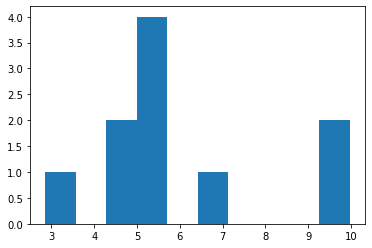

In [111]:
gamma.rvs(10, random_state=0)
_=plt.hist(gamma.rvs(10, random_state=0))

#### **예제 01. 파라미터 변경-a**

* a 값이 각각 `1,2,4,8`인 감마 분포와 누적 확률 분포를 그리세요.

sp.stats.gamma(a=a, b=1)

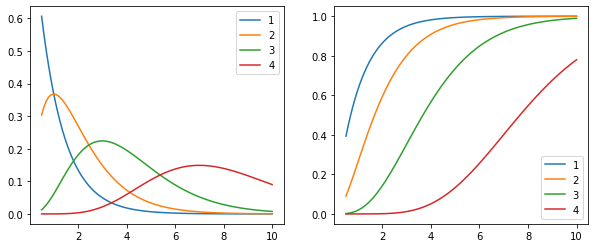

In [112]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()

xs = np.linspace(0.5, 10, 100)
a=[1,2,4,8]
for i, ai in enumerate(a):
  gamma = sp.stats.gamma(ai)
  axes[0].plot(xs, gamma.pdf(xs))
  axes[1].plot(xs, gamma.cdf(xs))
_=axes[0].legend(dfs)
_=axes[1].legend(dfs)

## | 균등함수

(0.0, 0.03)

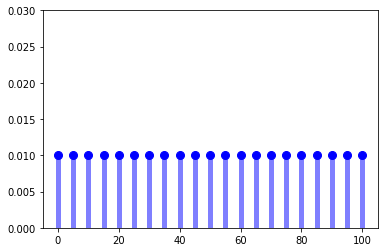

In [121]:
rv = uniform(loc=0, scale=100) # 균등확률객체 만들기
x = np.arange(0,101,5) # X 확률변수 범위
y = rv.pdf(x)
fig,ax = plt.subplots(1,1)
ax.plot(x,y,'bo',ms=8, label='uniform pdf')
ax.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
ax.set_ylim([0,0.03])

# | 지수함수

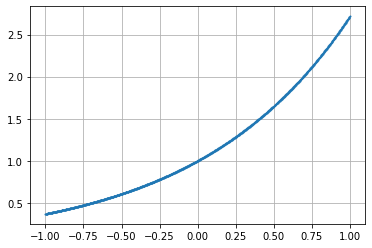

In [133]:
x = np.linspace(-1,1,1000)
y = np.exp(x)
plt.plot(x,y,'o',markersize=1)
plt.grid(True)

# | 감마함수

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


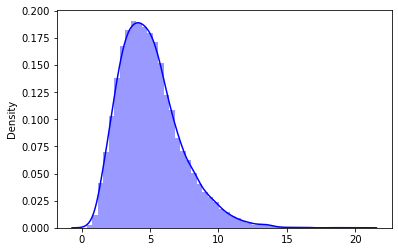

In [137]:
from scipy.stats import gamma
import seaborn as sns
data_gamma = gamma.rvs(a=5, size=10000)

ax = sns.distplot(data_gamma,
                  color='blue')

#| 베타분포

[        inf 10.06081329  7.11763973  5.81444813  5.03799208  4.50838548
  4.1176479   3.81412412  3.56958788  3.36714073  3.19596634  3.04877763
  2.92046219  2.80731326  2.70656899  2.61612373  2.53434032  2.45992408
  2.39183589  2.32923079  2.27141371  2.21780695  2.16792583  2.12136033
  2.0777609   2.03682747  1.9983008   1.96195559  1.92759498  1.89504611
  1.86415647  1.83479093  1.80682927  1.78016411  1.75469926  1.73034819
  1.70703286  1.68468269  1.66323361  1.64262739  1.62281091  1.60373561
  1.58535701  1.56763429  1.55052989  1.53400919  1.51804022  1.50259341
  1.48764137  1.47315866  1.45912164  1.4455083   1.43229814  1.419472
  1.40701197  1.3949013   1.38312428  1.37166617  1.36051315  1.3496522
  1.33907106  1.32875819  1.31870271  1.30889434  1.29932335  1.28998057
  1.28085729  1.27194528  1.26323671  1.25472418  1.24640063  1.23825938
  1.23029406  1.2224986   1.21486725  1.20739448  1.20007506  1.19290399
  1.18587647  1.17898795  1.17223406  1.16561061  1.15

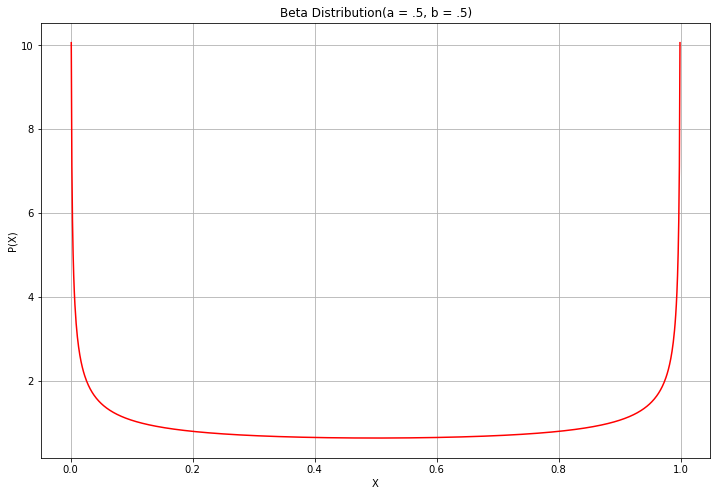

In [149]:
from scipy.stats import beta

y1 = beta(a, b).pdf(x)        
print(y1)

plt.figure(figsize=(12, 8))
plt.plot(x, y1, 'r')        
plt.xlabel('X')
plt.ylabel('P(X)')
plt.grid()
plt.title('Beta Distribution(a = .5, b = .5)') 
plt.show()

## 이산형 확률 분포
---

### |  **베르누이 분포**

\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}

* 기본사용

```
mu = 0.5
rv = sp.stats.bernoulli(mu)
```

* 확률 분포


* 누적 확률 분포


* 표본 추출

#### **예제 01. 동전 던지기**

동전을 던져서 앞면이 나온 확률



#### **예제 02. 주사위 굴리기**

주사위 던져서 6이 나온 확률


#### **예제 03. 같은 생일**

두 사람의 생일 월(月)이 같을 확률


#### **예제 04. 주머니 공**
주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

### |  **이항분포**

\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}


```
sp.stats.binom(N, mu)
```

* 확률 분포


* 누적 확률  분포

* 확률 변수 표본 추출


#### **예제 01. 동전 던지기**

* 동전을 1번 던졌을 때 앞면이 나온 횟수의 확률분포



* 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포


#### **예제 02. 주사위 굴리기**

* 주사위를 1번 던져서 짝수가 나온 횟수의 분포

* 주사위를 6번 던져서 짝수가 나온 횟수의 분포

* 주사위를 20번 던져서 짝수가 나온 횟수의 분포

* 주사위를 1번 던져서 6이 나온 횟수의 분포

* 주사위를 6번 던져서 6이 나온 횟수의 분포

* 주사위를 20번 던져서 6이 나온 횟수의 분포

### **| 카테고리 확률분포**

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}


```
sp.stats.multinomial(1, mu)
```

* 확률 분포


* 표본 추출


#### **예제 01.공정하지 않은 주사위**

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때 확률분포를 그래세요.

#### **예제 02. 주머니 공**

주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

#### **예제 03. 선호 자리**

교실에 5개의 자리가 있고 학생이 x번째 자리에 앉을 확률이 $f(X=x)=\frac{1}{2^{(x+1)}}$ 로 주어졌습니다. 확률 분포를 그리세요.